In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
df = pd.read_csv("hospital_cleaned_data.csv")

In [4]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,Country Name,Phone Number,Hospital Type,Hospital Ownership,...,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,True,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,True,4,Same as the national average,Not Available,Same as the national average,Not Available,Same as the national average,Same as the national average,Not Available,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,True,Not Available,Not Available,Not Available,Not Available,Not Available,Below the national average,Same as the national average,Not Available,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Provider ID                                           4812 non-null   int64 
 1   Hospital Name                                         4812 non-null   object
 2   Address                                               4812 non-null   object
 3   City                                                  4812 non-null   object
 4   State                                                 4812 non-null   object
 5   ZIP Code                                              4812 non-null   int64 
 6   Country Name                                          4812 non-null   object
 7   Phone Number                                          4812 non-null   int64 
 8   Hospital Type                                         4812 non-null 

In [6]:
df.describe()

,Provider ID,ZIP Code,Phone Number
count,4812.000000,4812.000000,4.812000e+03
mean,268294.422901,53990.132377,5.848244e+09
std,157109.340215,26915.916870,2.332196e+09
min,10001.000000,603.000000,9.369338e+08
25%,140185.750000,33015.250000,4.014563e+09
50%,260043.500000,55410.500000,6.053360e+09
75%,390222.250000,76035.500000,7.877574e+09
max,670118.000000,99929.000000,9.898943e+09


In [7]:
 df.isnull().sum()

Provider ID                                             0
Hospital Name                                           0
Address                                                 0
City                                                    0
State                                                   0
ZIP Code                                                0
Country Name                                            0
Phone Number                                            0
Hospital Type                                           0
Hospital Ownership                                      0
Emergency Services                                      0
Meets criteria for meaningful use of EHRs               0
Hospital overall rating                                 0
Mortality national comparison                           0
Safety of care national comparison                      0
Readmission national comparison                         0
Patient experience national comparison                  0
Effectiveness 

## 1. Overall Rating Distribution



In [8]:
df["Hospital overall rating"] = pd.to_numeric(df["Hospital overall rating"], errors='coerce')


In [9]:
rating_distribution = df["Hospital overall rating"].value_counts().sort_index()
print(rating_distribution)


Hospital overall rating
1.0     107
2.0     678
3.0    1761
4.0     939
5.0      82
Name: count, dtype: int64


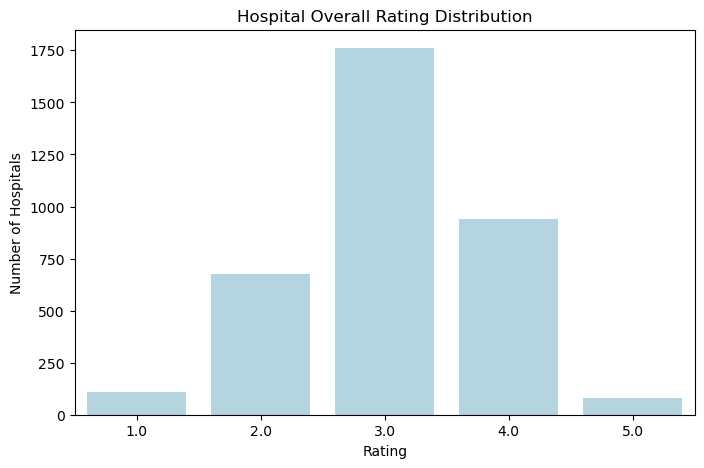

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values,color="#ADD8E6")
plt.title("Hospital Overall Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Hospitals")
plt.show()

In [73]:
# The distribution is mildly right-skewed, but close to normal.

#### Distribution of Ratings (Skewness & Kurtosis)

In [74]:
print("Skewness:", skew(rating_distribution))
print("Kurtosis:", kurtosis(rating_distribution))

Skewness: 0.5787531133931115
Kurtosis: -0.9553916173549113


# 2.hospital types 

In [45]:
hospital_types= df["Hospital Type"].value_counts()
hospital_types

Hospital Type
Acute Care Hospitals         3369
Critical Access Hospitals    1344
Childrens                      99
Name: count, dtype: int64

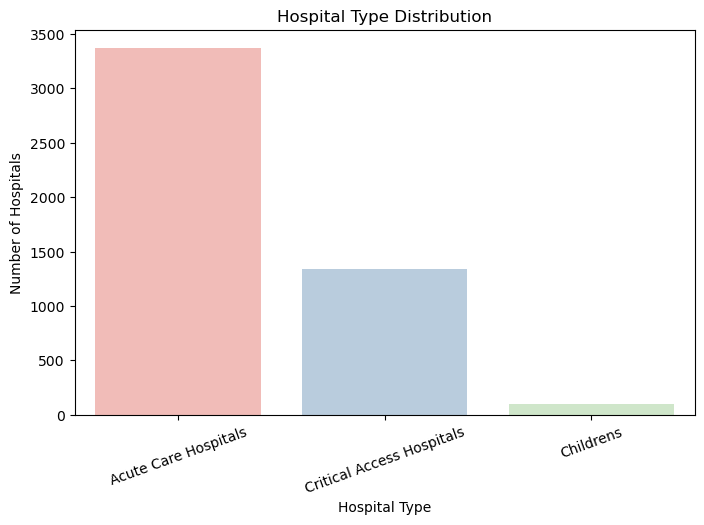

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=hospital_types.index, y=hospital_types.values,palette="Pastel1")
plt.title("Hospital Type Distribution")
plt.xlabel("Hospital Type")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=20)

plt.show()

#### - Acute Care Hospitals form the majority, signaling a focus on short-term, immediate medical care.

#### - Critical Access Hospitals, which serve rural areas, are the second most common—highlighting efforts to ensure healthcare access in remote regions.

#### - Children’s Hospitals are few in number, likely due to their specialized nature and concentrated demand.

## 3. Hospital Ownership Distribution

In [21]:
hospital_ownership = df["Hospital Ownership"].value_counts()
hospital_ownership

Hospital Ownership
Voluntary non-profit - Private                 2052
Proprietary                                     800
Government - Hospital District or Authority     561
Voluntary non-profit - Other                    462
Government - Local                              407
Voluntary non-profit - Church                   343
Physician                                        68
Government - State                               65
Government - Federal                             45
Tribal                                            9
Name: count, dtype: int64

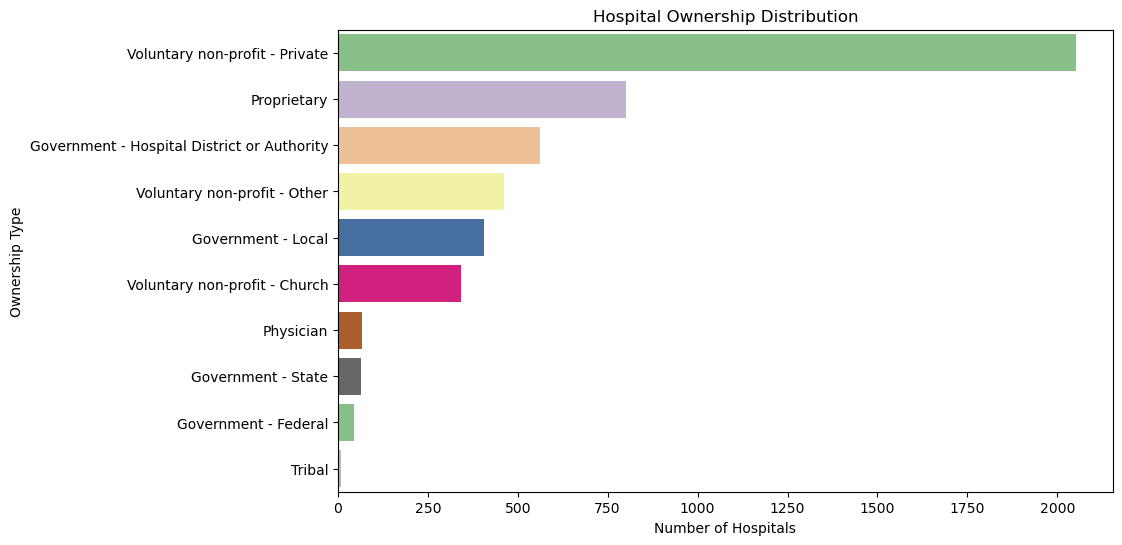

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hospital_ownership.values, y=hospital_ownership.index, palette="Accent")
plt.title("Hospital Ownership Distribution")
plt.xlabel("Number of Hospitals")
plt.ylabel("Ownership Type")
plt.show()

 ### Hospital Ownership Patterns
- Voluntary non-profit (Private) hospitals dominate, accounting for the highest count (over 2000).

- For-profit (Proprietary) hospitals and Government (District/Authority) also represent significant shares.

- Federal, State, and Tribal ownership types are minimal, suggesting limited central government presence in direct hospital management.



##  4. Emergency Services visualization

In [49]:
emergency_services = df["Emergency Services"].value_counts()
emergency_services

Emergency Services
True     4497
False     315
Name: count, dtype: int64

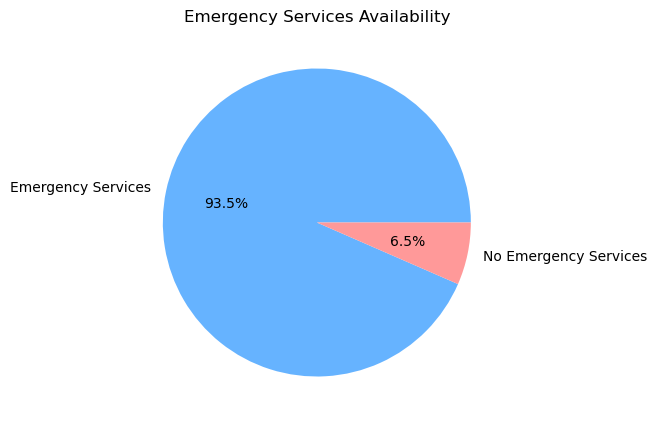

In [50]:
plt.figure(figsize=(5, 5))
plt.pie(emergency_services, labels=["Emergency Services", "No Emergency Services"], autopct="%1.1f%%",colors=["#66b3ff", "#ff9999"])
plt.title("Emergency Services Availability")
plt.show()

### - 93.5% of hospitals offer emergency services, showing a strong nationwide preparedness for urgent medical needs.

### - Only 6.5% lack emergency services, indicating potential gaps in rural or specialized facilities.

##  5. National Comparison Metrics (Quality Dimensions)

In [51]:
quality_cols = [
    "Mortality national comparison",
    "Safety of care national comparison",
    "Readmission national comparison",
    "Patient experience national comparison",
    "Effectiveness of care national comparison",
    "Timeliness of care national comparison",
    "Efficient use of medical imaging national comparison"
]



In [52]:
quality_summary = {}
for col in quality_cols:
    quality_summary[col] = df[col].value_counts(dropna=False)


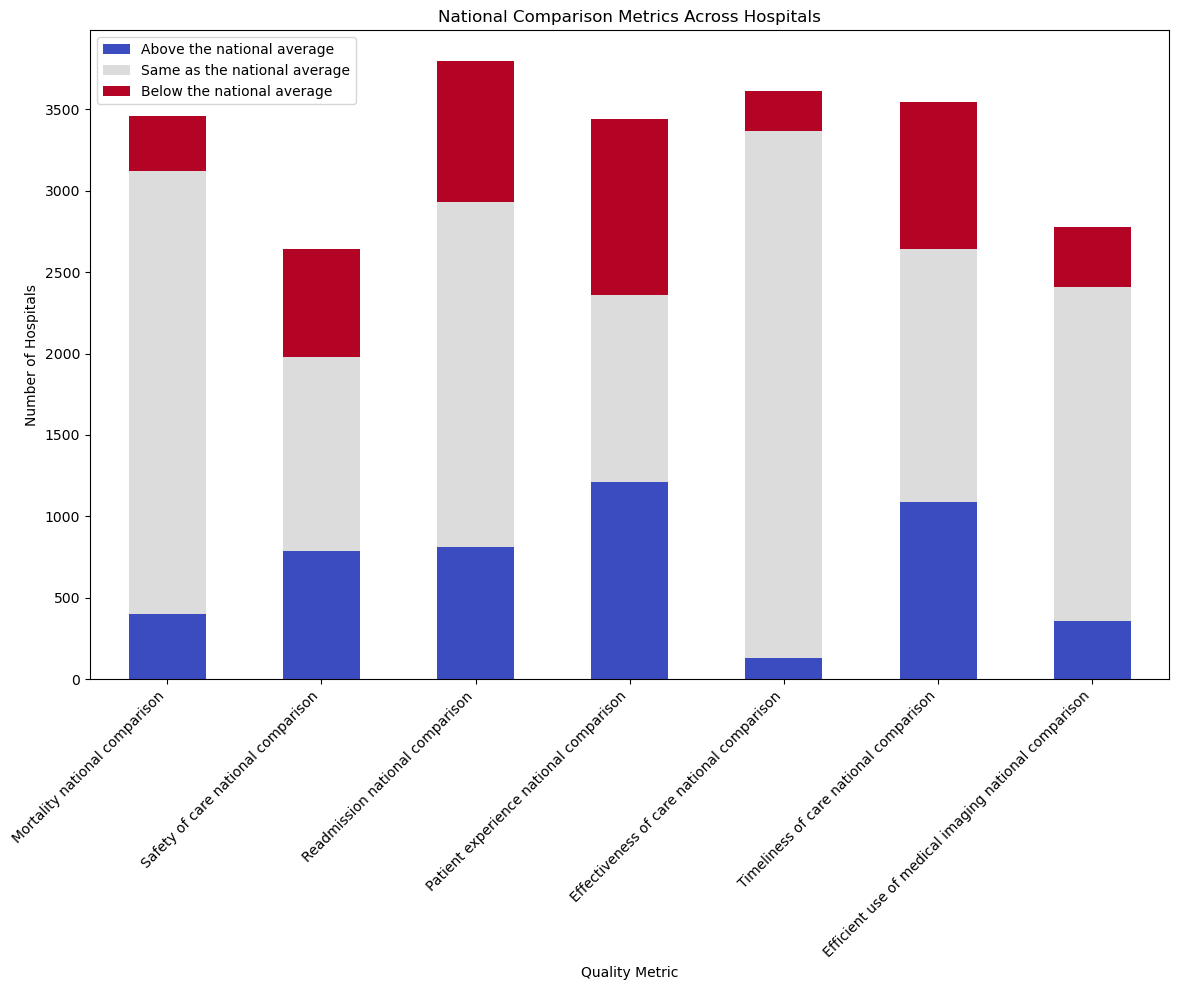

In [54]:
quality_df = pd.DataFrame(quality_summary).T.fillna(0)
quality_df = quality_df[["Above the national average", "Same as the national average", "Below the national average"]]
quality_df.plot(kind="bar", stacked=True, figsize=(12, 10), colormap='coolwarm')
plt.title("National Comparison Metrics Across Hospitals")
plt.xlabel("Quality Metric")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### - Most hospitals perform at or above the national average in effectiveness of care and patient experience.

#### - Mortality and medical imaging efficiency show room for improvement with higher counts below the national average.

## 6. Quality Score Calculation

In [32]:
score_map = {
    "Above the national average": 2,
    "Same as the national average": 1,
    "Below the national average": 0
}


In [33]:
scores = []
for i, row in df.iterrows():
    score = 0
    for col in quality_cols:
        value = row[col]
        if value in score_map:
            score += score_map[value]
    scores.append(score)

In [40]:
df["quality_score"] = scores

In [41]:
top10 = df.sort_values("quality_score", ascending=False).head(10)


In [42]:
# Display top hospitals
print(top10[["Hospital Name", "City", "State", "quality_score"]])

                                Hospital Name          City State  \
3421                  CITIZENS MEDICAL CENTER      VICTORIA    TX   
1566                         SHERMAN HOSPITAL         ELGIN    IL   
2823                        ST LUKES HOSPITAL  CHESTERFIELD    MO   
3109            MOSAIC LIFE CARE AT ST JOSEPH  SAINT JOSEPH    MO   
2148                 RIVERSIDE MEDICAL CENTER      KANKAKEE    IL   
4200                   SHANNON MEDICAL CENTER    SAN ANGELO    TX   
3265     AVERA HEART HOSPITAL OF SOUTH DAKOTA   SIOUX FALLS    SD   
672   SCOTTSDALE THOMPSON PEAK MEDICAL CENTER    SCOTTSDALE    AZ   
1387              ADVENTIST HINSDALE HOSPITAL      HINSDALE    IL   
3560                        FAIRVIEW HOSPITAL     CLEVELAND    OH   

      quality_score  
3421             13  
1566             12  
2823             12  
3109             12  
2148             12  
4200             12  
3265             12  
672              12  
1387             12  
3560             12 

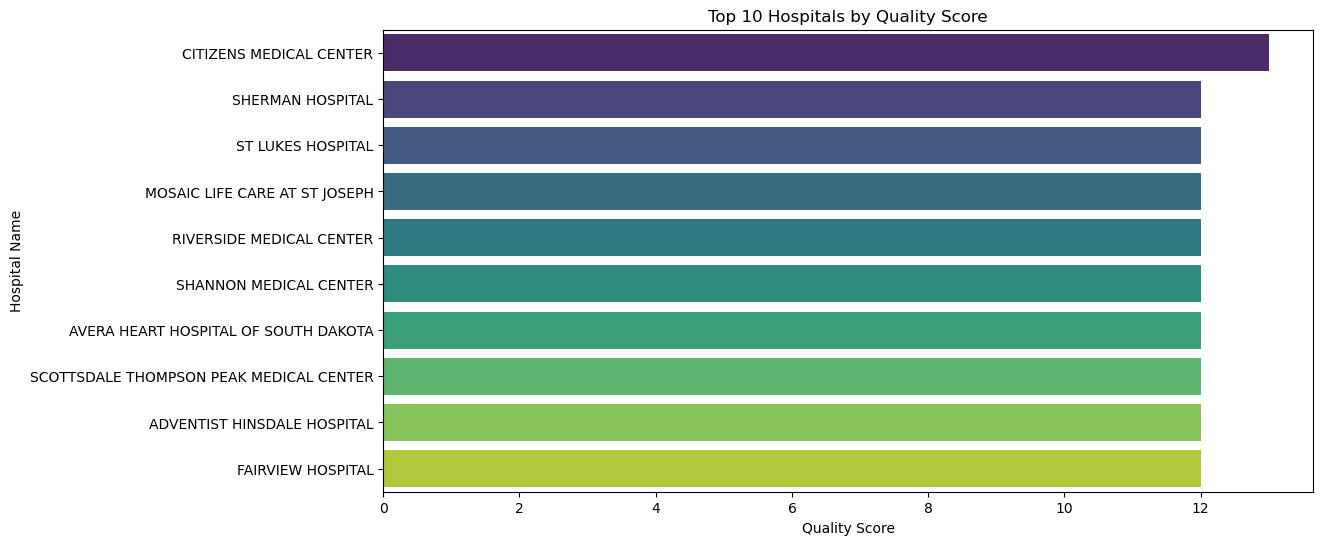

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top10,x="quality_score",y="Hospital Name",palette="viridis")

plt.title("Top 10 Hospitals by Quality Score")
plt.xlabel("Quality Score")
plt.ylabel("Hospital Name")

plt.show()

### - Citizens Medical Center leads in quality score.

### - Many top hospitals exhibit consistently high performance across multiple metrics.

## 7. Quality Score by Hospital Type

Hospital Type
Acute Care Hospitals         5.885723
Critical Access Hospitals    2.802083
Childrens                    0.000000
Name: quality_score, dtype: float64


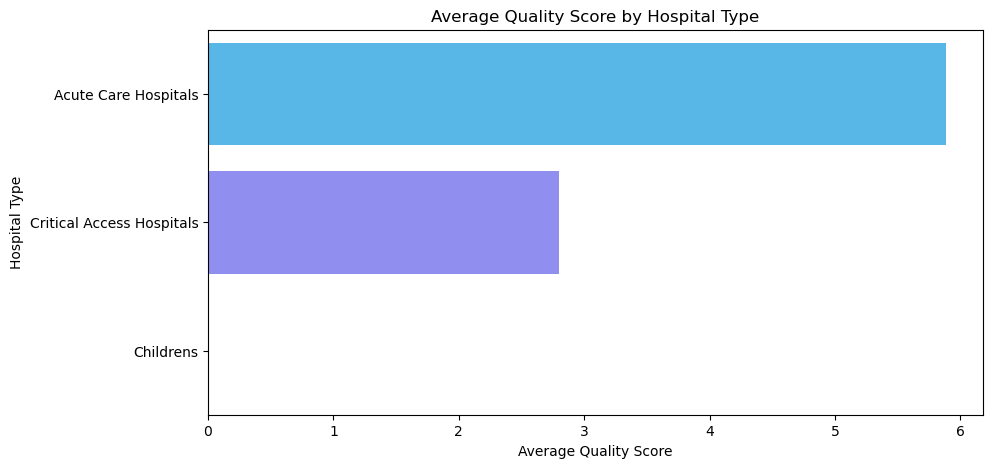

In [83]:
quality_by_type = df.groupby("Hospital Type")["quality_score"].mean().sort_values(ascending=False)
print(quality_by_type)

plt.figure(figsize=(10, 5))
sns.barplot(x=quality_by_type.values, y=quality_by_type.index, palette="cool")
plt.title("Average Quality Score by Hospital Type")
plt.xlabel("Average Quality Score")
plt.ylabel("Hospital Type")
plt.show()


insights :-  
*1.Acute care hospital:    
Has the highest average quality score.  
Considered the best-performing hospital type overall in terms of national quality metrics (mortality, safety, patient experience, etc.).    
*2. (critical Access Hospitals):  
Perform at an average or mixed level across the 7 quality metrics.  
*3.Childrens hospitals:  
Has the lowest quality scores on average.  
This could mean consistent issues in mortality rates, readmissions, or patient experience.  

## 8. State-wise Rating Comparison

In [85]:
state_rating = df.groupby("State")["Hospital overall rating"].mean().sort_values(ascending=False)

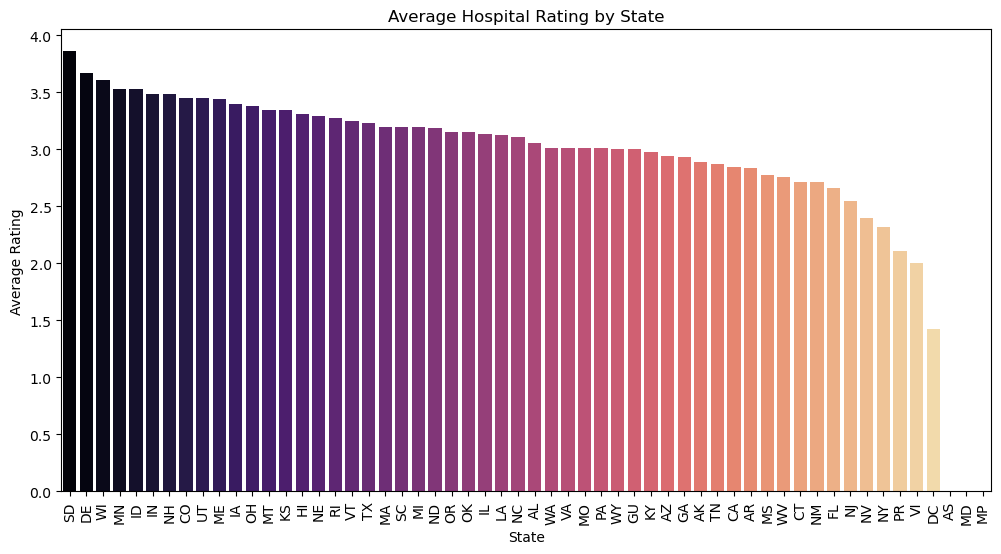

In [86]:

plt.figure(figsize=(12, 6))
sns.barplot(x=state_rating.index, y=state_rating.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Average Hospital Rating by State")
plt.ylabel("Average Rating")
plt.xlabel("State")
plt.show()


### - States like South Dakota and Delaware show the highest average ratings.

### - Some regions lag with ratings below 2, indicating regional disparities in healthcare quality.

## 9. Correlation between hospital rating and quality score

In [55]:
correlation = df[["Hospital overall rating", "quality_score"]].corr().iloc[0, 1]


In [56]:
print(f"Correlation between Hospital Rating and Quality Score: {correlation:.2f}")

Correlation between Hospital Rating and Quality Score: 0.61


In [ ]:
#A correlation of 0.61 means that hospitals with higher quality scores tend
# to have better overall ratings from patients or regulators.

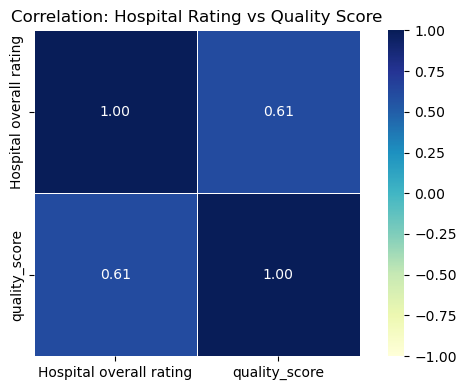

In [58]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    df[["Hospital overall rating", "quality_score"]].corr(),
    annot=True,
    cmap="YlGnBu",       # Beautiful cool color scheme
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True,
    fmt=".2f"
)
plt.title("Correlation: Hospital Rating vs Quality Score")
plt.tight_layout()
plt.show()


## 10. Group by State and Hospital Type, and calculate average quality score


In [66]:
quality_by_state_type = df.groupby(["State", "Hospital Type"])["quality_score"].mean().reset_index()

In [67]:
# Sort by score to find top combinations
top_state_type = quality_by_state_type.sort_values("quality_score", ascending=False).head(10)
print(top_state_type)  # View top 10 combinations

    State         Hospital Type  quality_score
130    WI  Acute Care Hospitals       8.575758
125    VT  Acute Care Hospitals       8.333333
34     IA  Acute Care Hospitals       7.941176
15     CO  Acute Care Hospitals       7.645833
41     IN  Acute Care Hospitals       7.611765
62     MN  Acute Care Hospitals       7.600000
80     NH  Acute Care Hospitals       7.538462
57     ME  Acute Care Hospitals       7.529412
22     DE  Acute Care Hospitals       7.500000
31     HI  Acute Care Hospitals       7.166667


C:\Users\mannh\AppData\Local\Temp\ipykernel_28548\3280813915.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_state_type, x="State", y="quality_score", hue="Hospital Type", ci=None, palette="Set2")


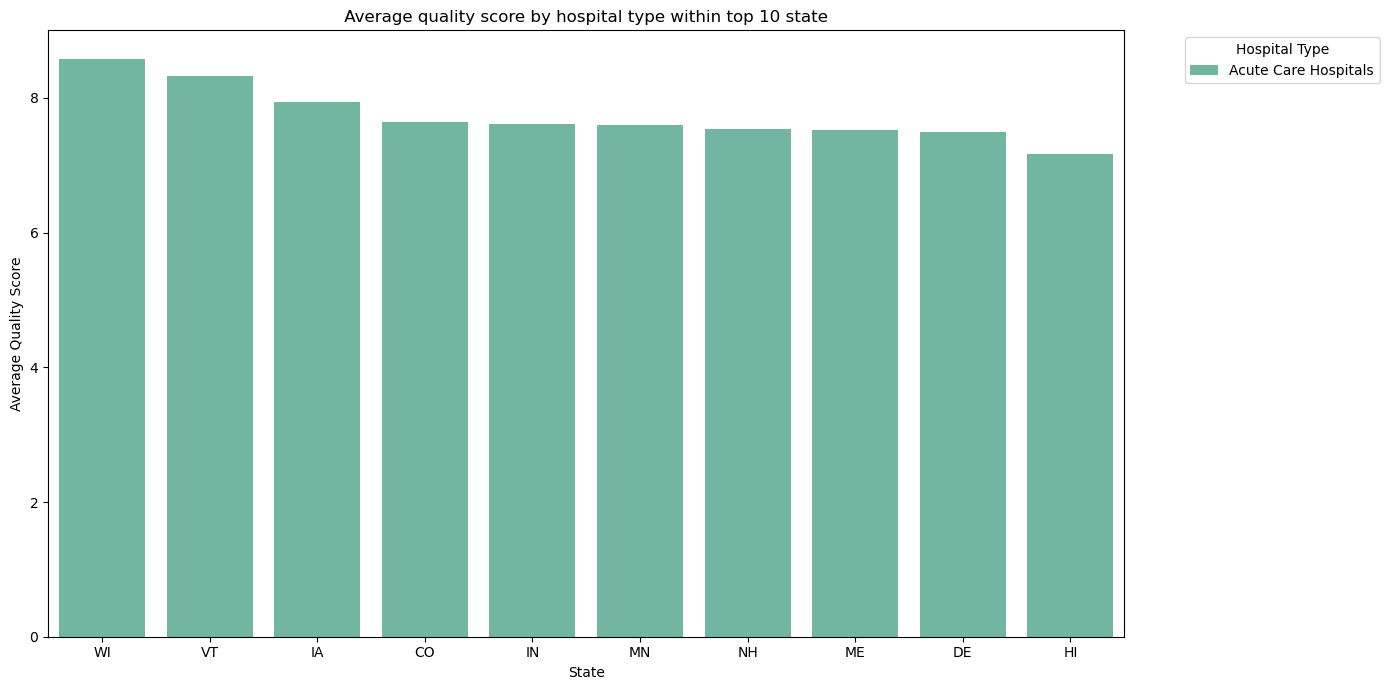

In [70]:
# Step 3: Plot - Average quality score by hospital type within each state
plt.figure(figsize=(14, 7))
sns.barplot(data=top_state_type, x="State", y="quality_score", hue="Hospital Type", ci=None, palette="Set2")

plt.title(" Average quality score by hospital type within top 10 state ")
plt.ylabel("Average Quality Score")
plt.xlabel("State")
plt.legend(title="Hospital Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- # "Acute Care Hospitals" dominate in quality  
   - This hospital type consistently scores higher in quality metrics (like mortality, safety, patient experience).
- # Other hospital types (e.g., Critical Access) may score lower
   - Not seeing them in the top means they don’t perform as highly across multiple metrics on average.
